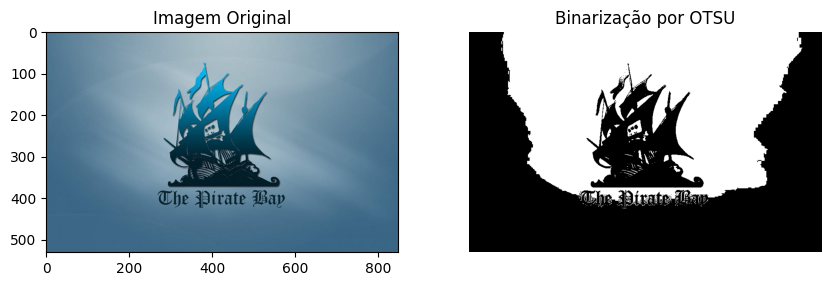

In [ ]:
#@title Binarização por OTSU
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Carrega a imagem
img1A = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/modelo.jpg', 1)

# Exibe a imagem original e o Resultado
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Imagem original
ax[0].imshow(cv.cvtColor(img1A, cv.COLOR_BGR2RGB))
ax[0].set_title("Imagem Original")

# Convertendo para tons de cinza
img_gray = cv.cvtColor(img1A, cv.COLOR_BGR2GRAY)

# Técnica de OTSU
ret, imgOtsu = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
ax[1].imshow(imgOtsu, cmap='gray')
ax[1].set_title("Binarização por OTSU")
ax[1].axis('off')

plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


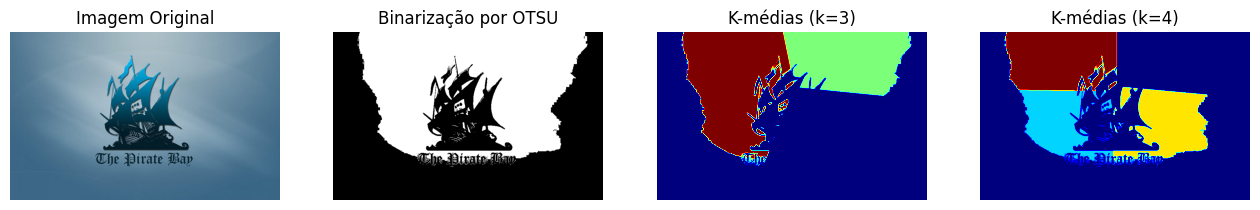

In [2]:
#@title Binarização por OTSU COM K-médias
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Carrega a imagem
img1A = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/modelo.jpg', 1)

# Convertendo para tons de cinza
img_gray = cv.cvtColor(img1A, cv.COLOR_BGR2GRAY)

# Técnica de OTSU para binarização
_, imgOtsu = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Exibe a imagem original, a binarizada e os resultados do K-médias
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

# Imagem original
ax[0].imshow(cv.cvtColor(img1A, cv.COLOR_BGR2RGB))
ax[0].set_title("Imagem Original")
ax[0].axis('off')

# Imagem binarizada por OTSU
ax[1].imshow(imgOtsu, cmap='gray')
ax[1].set_title("Binarização por OTSU")
ax[1].axis('off')

# Preparando os dados para K-médias (apenas pixels brancos)
coords = np.column_stack(np.where(imgOtsu == 255))

# Função para executar o K-médias e visualizar os resultados
def kmeans_and_plot(k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(coords)

    # Cria uma imagem com os rótulos dos clusters
    img_clusters = np.zeros_like(img_gray)
    for i in range(k-1):
        img_clusters[coords[labels == i][:, 0], coords[labels == i][:, 1]] = int(255 / k) * (i + 1)

    ax[k-1].imshow(img_clusters, cmap='jet')
    ax[k-1].set_title(f"K-médias (k={k})")
    ax[k-1].axis('off')

# Executa K-médias com diferentes valores de k
k_values = [3, 4]
for k in k_values:
    kmeans_and_plot(k)

plt.show()
